In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
import helpers
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

print('Packages loaded.')

Packages loaded.


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_pickle('churn_data_clean.pkl')
df['churn'] = df['churn'].astype(int, errors = 'ignore')


In [4]:
print(df.shape)
df.head()

(3333, 23)


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total_minutes,night_perc,eve_perc,total_calls,night_owl,day_only,traveler,eve_only
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,717.2,0.341188,0.275237,303,0,1,0,0
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,625.2,0.406910,0.312700,332,1,0,1,0
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,539.4,0.301446,0.224694,333,0,1,1,0
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,564.8,0.348619,0.109596,255,0,1,0,0
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,512.0,0.365039,0.289648,359,0,0,1,0


In [5]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [6]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
area code,3333,3,415,1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice mail plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7
total eve calls,3333.0,NaN,NaN,NaN,100.114311,19.922625,0.0,87.0,100.0,114.0,170.0
total night minutes,3333.0,NaN,NaN,NaN,200.872037,50.573847,23.2,167.0,201.2,235.3,395.0


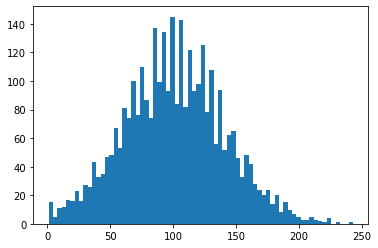

In [7]:
plt.hist(df['account length'], bins = 70)
plt.show()

In [8]:
features = ['account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls',
       'total_minutes', 'night_perc', 'eve_perc', 'total_calls']

In [9]:
X = df[features]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.2)


In [10]:
# at this point I will standardize all of the training data and then create a pipeline for that as well

X_train.head()

cat_lst = ['area code','international plan','voice mail plan']
con_lst = [x for x in X_train.columns.values if x not in cat_lst]


In [12]:
X_train, X_test = helpers.process_variables(X_train, X_test,cat_lst,con_lst)

In [13]:
X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total_minutes,night_perc,eve_perc,total_calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,-1.002286,-0.595943,0.174162,0.231080,-0.924691,0.808824,0.252466,0.300071,-0.012828,-1.016415,0.320909,-0.278524,0.500808,-0.924331,0.699851,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.109213,-0.595943,-1.339363,-1.453904,0.763894,-0.869923,-1.049873,0.707709,-1.771274,-0.209338,3.344026,-1.013691,-0.601896,1.879406,-0.966984,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.513395,-0.595943,-0.214768,-0.314062,-2.094012,1.063179,0.808343,0.758663,1.135545,-1.419953,1.076688,-0.830176,1.733002,-2.127580,0.758336,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.193923,1.007196,2.326119,1.123130,-0.219975,-0.869923,0.788490,0.351026,0.525472,-1.016415,-1.190650,1.732409,-0.254018,-1.161896,0.290453,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.608558,-0.595943,1.109796,0.974455,1.183600,-0.615567,0.129379,-0.617114,-0.479355,-0.209338,0.320909,1.396332,-0.697746,0.324424,-0.148188,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Without SMOTE

### Dummy Classifier

In [14]:
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report

In [15]:
#keeping score
score_keeper = {}

In [17]:
from sklearn.dummy import DummyClassifier
dummy_strat = DummyClassifier(strategy = 'stratified') # using the default stratified strategy
dummy_strat.fit(X_train, y_train)
y_pred = dummy_strat.predict(X_test)

f1_test = round(f1_score(y_test, y_pred, average = 'weighted'), 3)
acc_test = round(balanced_accuracy_score(y_test, y_pred), 3)
print('Test F1 score: ', f1_test, '/ Test Accuracy: ', acc_test)
score_keeper['baseline_strat'] = (f1_test, acc_test)

Test F1 score:  0.749 / Test Accuracy:  0.499


              precision    recall  f1-score   support

           0       0.85      0.86      0.85       568
           1       0.15      0.14      0.14        99

    accuracy                           0.75       667
   macro avg       0.50      0.50      0.50       667
weighted avg       0.75      0.75      0.75       667



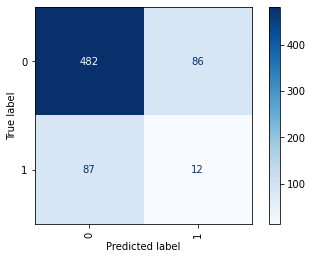

In [19]:
plot_confusion_matrix(dummy_strat, X_test, y_test, xticks_rotation = 'vertical', cmap = plt.cm.Blues)
print(classification_report(y_test, y_pred))

In [20]:
from sklearn.dummy import DummyClassifier
dummyc = DummyClassifier(strategy = 'constant', constant = 0) # using the default stratified strategy
dummyc.fit(X_train, y_train)
y_pred = dummyc.predict(X_test)

f1_test = round(f1_score(y_test, y_pred, average = 'weighted'), 3)
acc_test = round(balanced_accuracy_score(y_test, y_pred), 3)
print('Test F1 score: ', f1_test, '/ Test Accuracy: ', acc_test)
score_keeper['baseline_strat'] = (f1_test, acc_test)

Test F1 score:  0.783 / Test Accuracy:  0.5


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       568
           1       0.00      0.00      0.00        99

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.78       667



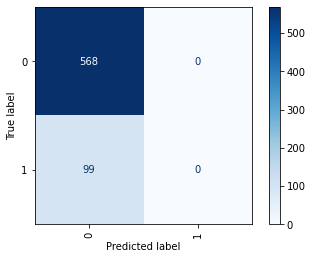

In [21]:
plot_confusion_matrix(dummyc, X_test, y_test, xticks_rotation = 'vertical', cmap = plt.cm.Blues)
print(classification_report(y_test, y_pred))

# SMOTE
The class imblance mean we will need to use an oversampling method. SMOTE will synthetically create new observations of the minority class.

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)